#Balancing an Imbalanced Dataset by Synthetc Data Generation using TabDDPM Model
The main aim is to balance the binary dataset by generation of synthetic data.
In order to generate synthetic data we have used TapDDPM model.

## Importing Data

Here we are using Credit Card Dataset that is available on Kaggle.The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions

Link : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# mounting drive
# can be changed as per need
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# path to dataset
# can be changed as per need
path='/content/drive/MyDrive/EXTRAS/creditcard.csv'
df=pd.read_csv(path)

# Data Exploration
Lets perform some initial explorations on our dataset

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Exploring the Dataset

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# counting fraud and no fraud classes
no_f=df['Class'].value_counts()[0]/len(df)*100
f=df['Class'].value_counts()[1]/len(df)*100
print("No Fraud cases =",no_f,"\nFraud cases =",f)

No Fraud cases = 99.82725143693798 
Fraud cases = 0.1727485630620034


So we see that via above our data is highly imbalanced for only about 0.17 percent are Fraud Classes

## Visualisations using Distributions

Lets add some visuals to aid our understanding of the dataset

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

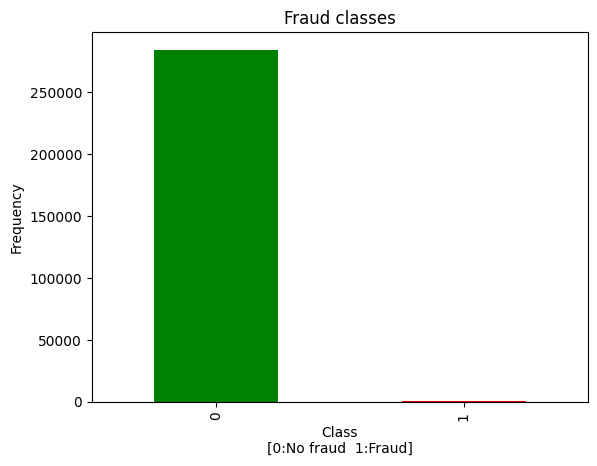

In [10]:
# creating a bar graph
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar',color=['green','red'])
plt.title("Fraud classes")
plt.xlabel("Class\n[0:No fraud  1:Fraud]")
plt.ylabel("Frequency")
plt.show()

In [11]:
# using seaborn
import seaborn as sns

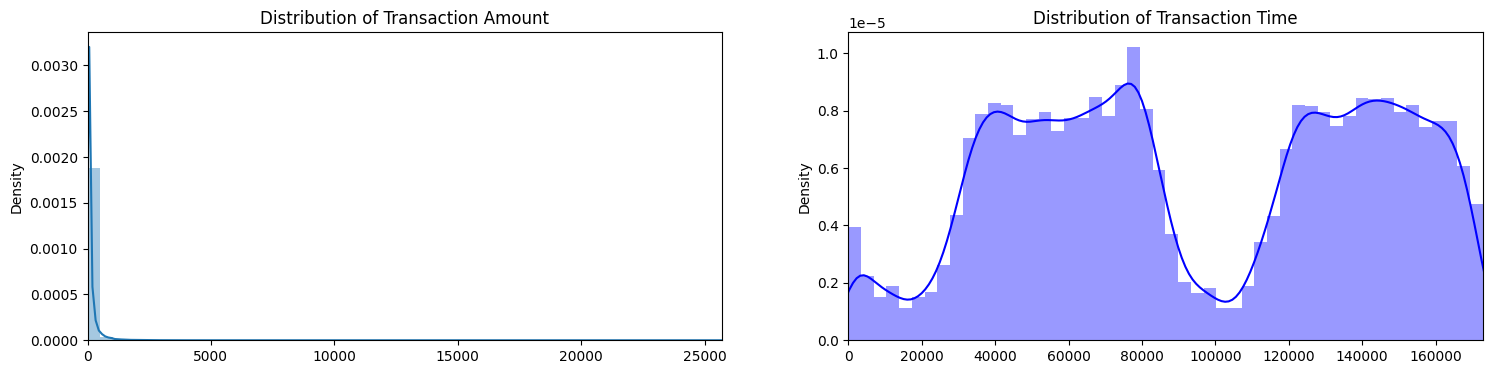

In [12]:
# adding displot
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amt_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amt_val, ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlim([min(amt_val), max(amt_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time')
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

## Separating class 1 and class 2 into two dataset

In [13]:
class1_data=df[df.Class == 1]
class0_data=df[df.Class == 0]

In [14]:
class1_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [15]:
class0_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Creation of model

Here we are using TabDDPM model for generation of synthetic data. The source code for this model is available on the link given below

Link to paper : https://arxiv.org/abs/2209.15421

Link: https://github.com/yandex-research/tab-ddpm

## Importing needed libraries


In [16]:
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader
from torch.distributions import Normal
from sklearn.preprocessing import StandardScaler

## Defining Diffusion model


In [17]:
# Defining the diffusion model
class DiffusionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DiffusionModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)


## Defining the class TabDDPM

In [18]:
# Defining the TabDDPM class
class TabDDPM:
    def __init__(self, input_dim, hidden_dim, output_dim, batch_size, num_epochs, lr):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")          # if cuda is supported
        self.model = DiffusionModel(input_dim, hidden_dim, output_dim).to(self.device)
        self.optimizer = Adam(self.model.parameters(), lr=lr)                               # using Adam as Optimizer
        self.batch_size = batch_size
        self.num_epochs = num_epochs

    def fit(self, train_loader):                                                             # training function
        self.model.train()
        for epoch in range(self.num_epochs):
            for x, _ in train_loader:
                x = x.to(self.device)
                x_hat = self.model(x)
                loss = nn.MSELoss()(x_hat, x)

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

            print(f"Epoch [{epoch+1}/{self.num_epochs}], Loss: {loss.item()}")

    def generate_samples(self, num_samples):                                                 # function for sample generation
        self.model.eval()
        with torch.no_grad():
            samples = torch.empty((num_samples, self.model.net[-1].out_features)).to(self.device)
            for i in range(num_samples):
                z = Normal(torch.zeros_like(samples[i]), torch.ones_like(samples[i])).sample()
                samples[i] = self.model.net(z)

        return samples.cpu().numpy()

## Preprocessing

In [19]:
# Setting hyperparameters
features = df.drop('Class', axis=1).values.astype(float)
input_dim = features.shape[1]
hidden_dim = 128
output_dim = input_dim
batch_size = 64
num_epochs = 10    # can be changed to desired value
lr = 1e-3

## Creating model

In [20]:
# Creating the TabDDPM model by passing the hyperparameters
tabddpm = TabDDPM(input_dim, hidden_dim, output_dim, batch_size, num_epochs, lr)

## Applying 10 fold cross-validation on original dataset and training the model using the same

Now we wil use 10 fold cross-validation on our dataset. For each fold existing Class 0 and Class 1 are divided into 10 equal parts. One part is used for testing and the remaining 9 parts are used to train the TabDDPM model.

In [21]:
class0_data=df[df.Class == 0]
class1_data=df[df.Class == 1]

In [22]:
# normalization of data using z scores

df_1 = class1_data.copy()
df_2 = class0_data.copy()
# apply normalization techniques
for column in df_1.columns:
    if column == 'Class':
      df_1[column] = df_1[column]
    else:
      df_1[column] = (df_1[column] -
                           df_1[column].mean()) / df_1[column].std()

for column in df_2.columns:
    if column == 'Class':
      df_2[column] = df_2[column]
    else:
      df_2[column] = (df_2[column] -
                           df_2[column].mean()) / df_2[column].std()


In [23]:
class1_data = df_1
class0_data = df_2

In [24]:
class0=np.array_split(class0_data,10)
class1=np.array_split(class1_data,10)

In [25]:
data=[]
for i in range(10):
  df1 = class0[i]
  df2 = class1[i]
  x = pd.concat([df1, df2])
  x=x.sample(frac = 1)
  data.append(x)

In [26]:
data[0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
25991,-1.284121,-0.186226,-1.543153,0.287223,1.232375,-1.002632,0.972109,0.029806,0.343735,0.652942,...,0.647180,-0.137201,-0.915192,-0.448876,-0.120555,-0.910764,-0.099335,0.433127,2.525774,0
10343,-1.649865,0.055013,-1.086908,0.207762,1.404562,-0.378524,1.375392,-0.053501,0.244891,2.085081,...,-0.379969,-1.759415,-0.839708,-1.935904,0.655620,-1.139084,-0.095575,0.277823,1.775410,0
15847,-1.422525,-0.695678,-0.291320,2.050080,-0.853364,-1.151350,-0.208219,-0.299207,0.102530,-0.182709,...,0.324465,1.311915,-0.375204,1.651459,0.939777,-0.381554,0.639591,0.465434,0.115267,0
2340,-1.957653,0.582295,-0.028780,0.801708,0.825565,-0.535940,0.236685,-0.544428,0.196367,0.522782,...,-0.034025,0.170238,-0.104159,0.025427,0.856582,-0.845108,0.179998,0.079181,-0.313072,0
18711,-1.371603,0.565338,-1.023680,0.335203,-1.012373,-1.141308,0.276752,-1.061593,0.250620,-1.674494,...,-0.265299,-0.762098,0.192654,-0.598359,-0.275298,-0.785760,0.093216,0.105182,0.262286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17125,-1.397948,0.588819,0.349326,-0.037024,1.665513,0.262242,-0.248199,0.400050,-0.091411,-1.151358,...,0.045949,-0.074146,-0.296601,-0.017036,1.385887,0.144120,-0.129973,0.005484,-0.206397,0
16556,-1.409173,-0.081786,0.204715,1.136442,-0.827764,-0.295686,-0.798379,0.586880,-0.277742,1.154355,...,-0.006977,0.629371,-0.494926,1.244024,0.657219,-1.344883,-0.185141,-0.591962,-0.335023,0
1006,-1.981303,0.270606,-0.966140,0.778462,0.512661,-1.198752,0.571687,-0.681016,0.360514,1.309025,...,0.348512,0.659665,-0.493698,0.571160,0.260439,2.489868,-0.142784,0.145293,0.812015,0
24534,-1.296525,0.457677,-0.311699,0.379333,-0.459727,-0.910895,-0.398942,-0.829164,0.052427,-0.087790,...,0.628916,1.667364,0.235868,-0.210390,-1.818056,-0.307728,-0.276184,-0.425547,-0.273089,0


In [27]:
# importing needed libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, cohen_kappa_score, average_precision_score, accuracy_score
from sklearn.model_selection import cross_validate

In [28]:
# defining random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

In [29]:
# Function to train the model
def model_train(i, df):
  scaler = StandardScaler() # using standard scalar
  df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

  # Splitting the dataset into features and labels
  features = df.drop('Class', axis=1).values.astype(float)
  labels = df['Class'].values.astype(float)


    # Setting hyperparameters
  features = df.drop('Class', axis=1).values.astype(float)
  input_dim = features.shape[1]
  hidden_dim = 128
  output_dim = input_dim
  batch_size = 64
  num_epochs = 2000
  lr = 1e-3


  # Creating PyTorch DataLoader
  dataset = torch.utils.data.TensorDataset(torch.from_numpy(features).float(), torch.from_numpy(labels).float())
  dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

  #training
  tabddpm.fit(dataloader)

In [30]:
# Function to generate samples
def generate(num_samples):
  synthetic_samples = tabddpm.generate_samples(num_samples)
  new=pd.DataFrame(synthetic_samples)
  return new

In [38]:
# Performing cross-validation and calculate evaluation metrics
for fold in range(10):
    print(f"Fold {fold+1}:")
    print("Training the tabddpm model ...............")

    test = data[fold]
    train=pd.DataFrame()
    for i in range(10):
      if i != fold:
        train = pd.concat([train,data[i]])
    train=train.sample(frac=1)

    #Train the model
    model_train(fold, train)



    #Generate samples
    no =  pd.value_counts(train['Class'])[0]-pd.value_counts(train['Class'])[1]
    samples=generate(no)

    # Balance the train
    samples['Class']=[1]*no
    samples.columns=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']
    new_data=pd.concat([train,samples])
    new_data=new_data.sample(frac=1)



    # Generation of data
    x_train = new_data.drop('Class', axis=1).values.astype(float)
    y_train = new_data['Class'].values.astype(float)

    x_test = test.drop('Class', axis=1).values.astype(float)
    y_test = test['Class'].values.astype(float)




    # Testing

    rf_classifier.fit(x_train,y_train)
    pred = rf_classifier.predict(x_test)


    # Calculate evaluation metrics
    f1 = f1_score(y_test, pred, average='macro')
    kappa = cohen_kappa_score(y_test, pred)
    avg_precision = average_precision_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)

    # Print the evaluation metrics for the fold
    print(f"  F1-Score: {f1}")
    print(f"  Kappa-Score: {kappa}")
    print(f"  Average Precision Score: {avg_precision}")
    print(f"  Accuracy: {accuracy}")
    print()




Fold 1:
Training the tabddpm model ...............
Epoch [1/10], Loss: 2.1613072021864355e-05
Epoch [2/10], Loss: 0.00034111450077034533
Epoch [3/10], Loss: 0.0014398901257663965
Epoch [4/10], Loss: 3.021570955752395e-05
Epoch [5/10], Loss: 5.228597729001194e-05
Epoch [6/10], Loss: 0.0008388662827201188
Epoch [7/10], Loss: 3.892503445968032e-05
Epoch [8/10], Loss: 4.501939474721439e-05
Epoch [9/10], Loss: 4.695410461863503e-05
Epoch [10/10], Loss: 0.006072883028537035
  F1-Score: 0.03249270910956025
  Kappa-Score: 0.00011475838417862594
  Average Precision Score: 0.0018127764484083824
  Accuracy: 0.0333543992697142

Fold 2:
Training the tabddpm model ...............
Epoch [1/10], Loss: 3.912566899089143e-05
Epoch [2/10], Loss: 2.548322663642466e-05
Epoch [3/10], Loss: 0.00022355701366905123
Epoch [4/10], Loss: 1.4122636457614135e-05
Epoch [5/10], Loss: 0.00010225517326034606
Epoch [6/10], Loss: 0.00036087282933294773
Epoch [7/10], Loss: 3.792082497966476e-05
Epoch [8/10], Loss: 8.58682

In [39]:
# viewing a part of newly generated data
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15183,-1.438425,0.618249,-0.032705,0.431598,0.553516,-0.545252,-0.511694,-0.136703,-0.055066,0.589127,...,-0.420487,-1.061126,0.126422,0.665035,0.550663,0.594998,-0.074988,0.050200,-0.281052,0
239432,1.163924,-0.817868,-1.145791,0.523445,-0.937922,-0.281929,0.048117,1.258582,-0.183632,0.597223,...,0.701844,0.794296,1.537349,0.787014,0.065563,1.468607,-0.714546,-0.135095,1.554359,0
185403,-0.485856,-0.045759,-1.232769,-0.595244,-0.929077,-0.321566,-0.838624,-0.906727,0.722818,1.278411,...,0.180780,-0.039204,2.430045,-0.379671,1.350767,-0.218071,-1.101597,-0.276759,0.908801,1
144671,-1.717895,-1.484106,-1.019637,0.009504,0.139557,-0.888042,1.834144,-0.584883,1.283361,-0.285680,...,0.072914,0.545595,-0.664909,-0.506368,-0.985920,0.199492,-0.733169,0.828083,-1.488458,1
114790,-0.666084,-1.857371,-1.009437,-0.443898,-0.462256,0.521758,-0.788859,-0.677450,-0.620284,0.677271,...,-0.269987,1.238869,-0.430004,-0.612749,-2.414547,0.985933,-0.413827,-0.788786,-0.648644,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135274,-0.287638,-0.348919,-0.512064,0.844039,-0.258318,0.386463,1.202478,0.258357,-0.066840,0.825284,...,-0.342629,0.005988,-0.236561,-2.629991,-2.054477,1.942303,-0.248791,-1.117813,0.388089,0
31509,-0.573810,-0.380366,1.248855,-0.103676,0.733691,-0.992199,1.064805,-1.186607,0.429608,0.060653,...,-0.663168,0.280854,-0.374315,1.372659,-0.840947,-2.482972,0.279561,-0.665903,0.277049,1
21587,1.044812,1.131233,1.275586,0.068503,-0.867354,-0.058762,-1.101692,-2.201816,0.562918,-0.538556,...,-0.278528,-0.639705,0.186819,0.662464,0.508393,0.124010,-0.379389,1.740970,0.025759,1
248846,1.856314,-0.746108,-0.610705,0.432410,0.800961,1.095557,0.870631,-0.402191,-0.830945,-0.425137,...,0.124966,0.568405,2.470027,-0.353439,-0.937669,-0.476463,-0.321991,-1.103349,1.477248,1


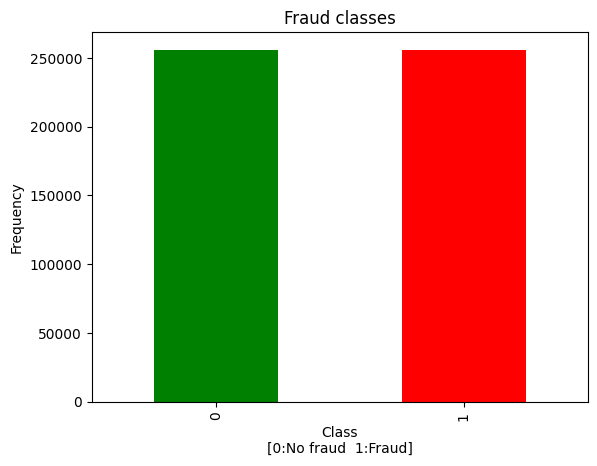

In [40]:
# creating a bar graph for our new data
df = new_data
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar',color=['green','red'])
plt.title("Fraud classes")
plt.xlabel("Class\n[0:No fraud  1:Fraud]")
plt.ylabel("Frequency")
plt.show()

Now we can clearly see that the dataset is balanced.